In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.arange(-10,11)
print(f'x is : {x}')

x is : [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


In [3]:
def sigmoid(z):
    y = 1/(1+np.exp(-z))
    return y

In [15]:
y = sigmoid(x)
print(f"y is : {x.shape}")
print(f"        X       |       y       | \n {np.c_[x,y]}")

y is : (21,)
        X       |       y       | 
 [[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]
 [ 1.00000000e+01  9.99954602e-01]]


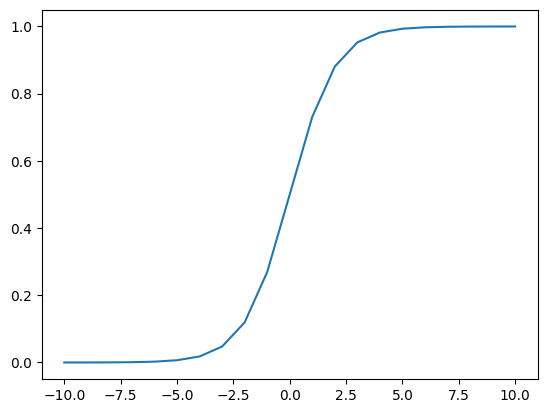

In [16]:
plt.plot(x,y)

In [19]:
w= 0.5; b = 1
xx = w*x+b
yy = sigmoid(xx)
print(np.c_[xx,yy])

[[-4.          0.01798621]
 [-3.5         0.02931223]
 [-3.          0.04742587]
 [-2.5         0.07585818]
 [-2.          0.11920292]
 [-1.5         0.18242552]
 [-1.          0.26894142]
 [-0.5         0.37754067]
 [ 0.          0.5       ]
 [ 0.5         0.62245933]
 [ 1.          0.73105858]
 [ 1.5         0.81757448]
 [ 2.          0.88079708]
 [ 2.5         0.92414182]
 [ 3.          0.95257413]
 [ 3.5         0.97068777]
 [ 4.          0.98201379]
 [ 4.5         0.98901306]
 [ 5.          0.99330715]
 [ 5.5         0.99592986]
 [ 6.          0.99752738]]


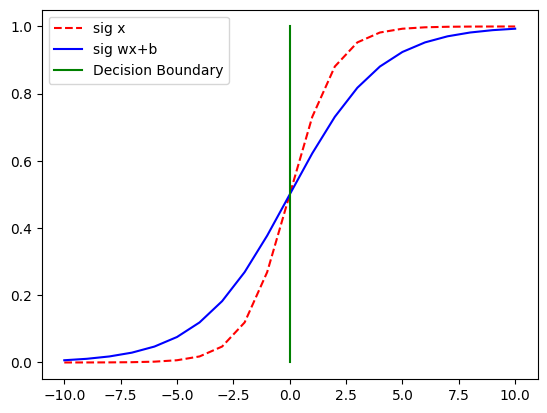

In [53]:
w= 0.5; b = 0
xx = w*x+b
yy = sigmoid(xx)
plt.plot(x, y, c="r", linestyle="--", label="sig x")  # Red dashed line
plt.plot(x, yy, c="b", label="sig wx+b")  # Blue solid line
plt.plot(np.ones(len(x))*b,y, c="g",label= "Decision Boundary")
plt.legend()  # Display the legend

plt.show() 

(array([3, 4, 5], dtype=int64), array([0, 0, 0], dtype=int64))
(array([0, 1, 2], dtype=int64), array([0, 0, 0], dtype=int64))


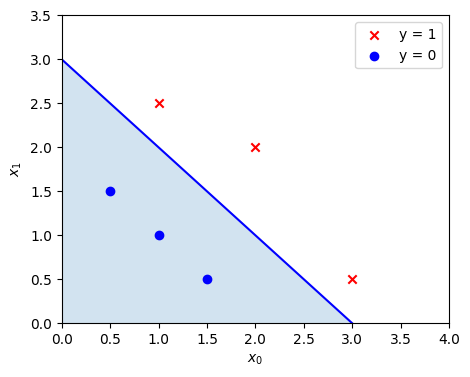

In [70]:
x0 = np.arange(0,6)
x1 = 3 - x0
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
indices = np.where(y==1)
print(indices)
ind = np.where(y==0)
print(ind)
plt.scatter(X[indices[0],0] ,X[indices[0],1], c = "r" , marker="x", label = "y = 1")
plt.scatter(X[ind[0],0] ,X[ind[0],1], c = "b" , marker="o", label = "y = 0")
plt.legend()
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

# Cost function for Log Reg
the previous MSE Cost function can not be used bcs it is not convex and it does not gurantee convergence to "global minimum"

In [85]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [86]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [87]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [88]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


In [91]:
def compute_cost_logistic(X, y, w, b, lambda_=0, safe=False):
    """
    Computes cost using logistic loss, non-matrix version

    Args:
      X (ndarray): Shape (m,n)  matrix of examples with n features
      y (ndarray): Shape (m,)   target values
      w (ndarray): Shape (n,)   parameters for prediction
      b (scalar):               parameter  for prediction
      lambda_ : (scalar, float) Controls amount of regularization, 0 = no regularization
      safe : (boolean)          True-selects under/overflow safe algorithm
    Returns:
      cost (scalar): cost
    """

    m,n = X.shape
    cost = 0.0
    for i in range(m):
        z_i    = np.dot(X[i],w) + b                                             #(n,)(n,) or (n,) ()
        if safe:  #avoids overflows
            cost += -(y[i] * z_i ) + log_1pexp(z_i)
        else:
            f_wb_i = sigmoid(z_i)                                                   #(n,)
            cost  += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)       # scalar
    cost = cost/m

    reg_cost = 0
    if lambda_ != 0:
        for j in range(n):
            reg_cost += (w[j]**2)                                               # scalar
        reg_cost = (lambda_/(2*m))*reg_cost

    return cost + reg_cost


In [93]:
import copy
import math
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


# Let's Use Sklearn

In [94]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [95]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [96]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


In [101]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0


In [103]:
print(f"w ={lr_model.coef_} and b = {lr_model.intercept_}")

w =[[0.90411349 0.73587543]] and b = [-2.33371631]
